# EDA for training dataset

data: https://www.kaggle.com/datasets/allanjackson/rossmann


check also the walmart dataset 

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from matplotlib.cbook import boxplot_stats

import datetime
from datetime import timedelta
from datetime import datetime

import statsmodels.tsa.api as smt
import statsmodels.tsa as tsa
from statsmodels.tsa.deterministic import DeterministicProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from pmdarima.arima import auto_arima


In [2]:
df_train = pd.read_csv(r'data\train.csv', index_col = ['Store', 'Date'], parse_dates = True,)

C:\Users\Ashraf Habromman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_train.head() 

DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Store Date                                                                
1     2015-07-31          5   5263        555     1      1            0   
2     2015-07-31          5   6064        625     1      1            0   
3     2015-07-31          5   8314        821     1      1            0   
4     2015-07-31          5  13995       1498     1      1            0   
5     2015-07-31          5   4822        559     1      1            0   

                  SchoolHoliday  
Store Date                       
1     2015-07-31              1  
2     2015-07-31              1  
3     2015-07-31              1  
4     2015-07-31              1  
5     2015-07-31              1

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1017209 entries, (1, Timestamp('2015-07-31 00:00:00')) to (1115, Timestamp('2013-01-01 00:00:00'))
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   DayOfWeek      1017209 non-null  int64 
 1   Sales          1017209 non-null  int64 
 2   Customers      1017209 non-null  int64 
 3   Open           1017209 non-null  int64 
 4   Promo          1017209 non-null  int64 
 5   StateHoliday   1017209 non-null  object
 6   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 58.3+ MB


In [5]:
print(df_train.index.get_level_values('Date').min())
print(df_train.index.get_level_values('Date').max())
print(df_train.index.get_level_values('Date').max() - df_train.index.get_level_values('Date').min() + timedelta(days=1))

2013-01-01 00:00:00
2015-07-31 00:00:00
942 days 00:00:00


*  There is no any null values in the training dataset
*  But 

In [6]:
num_entries = 1115* 942
missing = num_entries - len(df_train)
print(f"Number of entries sholud be {1115 * 942}")
print(f"So we have missing values {missing}")

Number of entries sholud be 1050330
So we have missing values 33121


Sort values ascending based on date  

In [7]:
df_train.sort_values(by=[ 'Store','Date'], inplace=True)

In [8]:
df_train.drop('DayOfWeek', axis=1, inplace=True)

In [9]:
df_train.head()

Sales  Customers  Open  Promo StateHoliday  SchoolHoliday
Store Date                                                                 
1     2013-01-01      0          0     0      0            a              1
      2013-01-02   5530        668     1      0            0              1
      2013-01-03   4327        578     1      0            0              1
      2013-01-04   4486        619     1      0            0              1
      2013-01-05   4997        635     1      0            0              1

In [10]:
# df_train.index.get_level_values('Date').dayofweek

In [11]:
df_train['DayOfWeek'] = df_train.index.get_level_values('Date').dayofweek
df_train['Week'] = df_train.index.get_level_values('Date').week 
df_train['month'] = df_train.index.get_level_values('Date').month
df_train['year'] = df_train.index.get_level_values('Date').year
df_train['dayofyear'] = df_train.index.get_level_values('Date').dayofyear

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/3355756622.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_train['Week'] = df_train.index.get_level_values('Date').week


### Read Stroe file 

In [12]:
df_store = pd.read_csv(r'data\store.csv')
df_store.head()


Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [13]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [14]:
df_store.isnull().sum() 

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Merging the two files 

In [15]:
# df_train[df_train['DayOfWeek'] == 6].head()

In [16]:
df_train.reset_index('Date', inplace=True)
train_store = pd.merge(df_train, df_store, how='inner', on='Store')
train_store.head()

Store       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1 2013-01-01      0          0     0      0            a   
1      1 2013-01-02   5530        668     1      0            0   
2      1 2013-01-03   4327        578     1      0            0   
3      1 2013-01-04   4486        619     1      0            0   
4      1 2013-01-05   4997        635     1      0            0   

   SchoolHoliday  DayOfWeek  Week  ...  dayofyear  StoreType  Assortment  \
0              1          1     1  ...          1          c           a   
1              1          2     1  ...          2          c           a   
2              1          3     1  ...          3          c           a   
3              1          4     1  ...          4          c           a   
4              1          5     1  ...          5          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              1270.0                       9.0                    2008.0   
1              1270.0                       9.0                    2008.0   
2              1270.0                       9.0                    2008.0   
3              1270.0                       9.0                    2008.0   
4              1270.0                       9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              NaN              NaN            NaN  
1       0              NaN              NaN            NaN  
2       0              NaN              NaN            NaN  
3       0              NaN              NaN            NaN  
4       0              NaN              NaN            NaN  

[5 rows x 22 columns]

In [17]:
df_train.set_index('Date', inplace=True, append=True)
# df_train.head()

In [18]:
cats = ['Open', 'Promo', 'SchoolHoliday', 'StateHoliday']
nums = ['Sales', 'Customers']
# df_train['SchoolHoliday'].unique()

#### Check the categorical features  

In [19]:
for cat in cats: 
    print(f'unique values for {cat} is: ')
    print(df_train[cat].unique())
    print(df_train[cat].value_counts().sort_values())
    print()

unique values for Open is: 
[0 1]
0    172817
1    844392
Name: Open, dtype: int64

unique values for Promo is: 
[0 1]
1    388080
0    629129
Name: Promo, dtype: int64

unique values for SchoolHoliday is: 
[1 0]
1    181721
0    835488
Name: SchoolHoliday, dtype: int64

unique values for StateHoliday is: 
['a' '0' 'b' 'c' 0]
c      4100
b      6690
a     20260
0    131072
0    855087
Name: StateHoliday, dtype: int64



In [20]:
days_num = [0, 1, 2, 3, 4, 5, 6]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

### Check the Midding values 

In [21]:

stores = df_train.groupby('Store')
stores_have_miss= {}
for store_num, store in stores:
    
    index = pd.Series(1, index = df_train.loc[store_num,:].index).asfreq('D')
    index_miss = index[index.isnull()].index
    first_miss = True
    if len(index_miss) != 0: 
        if first_miss: 
            prev_index_miss = index_miss
            total_index = index_miss
            first_miss = False
        new_index_date = total_index.difference(index_miss)
        total_index.append(new_index_date)
        total_index.sort_values()
        prev_index_miss = index_miss
        stores_have_miss[store_num] = len(index_miss)
#         stores_have_nan['num_missing'] = len(indNa)
        
        
stores_have_miss

{13: 184,
 20: 184,
 22: 184,
 32: 184,
 36: 184,
 41: 184,
 46: 184,
 51: 184,
 52: 184,
 58: 184,
 72: 184,
 76: 184,
 81: 184,
 89: 184,
 99: 184,
 100: 184,
 108: 184,
 113: 184,
 115: 184,
 127: 184,
 129: 184,
 132: 184,
 136: 184,
 137: 184,
 139: 184,
 144: 184,
 145: 184,
 149: 184,
 155: 184,
 159: 184,
 164: 184,
 165: 184,
 172: 184,
 174: 184,
 181: 184,
 183: 184,
 186: 184,
 190: 184,
 191: 184,
 192: 184,
 204: 184,
 215: 184,
 218: 184,
 231: 184,
 243: 184,
 258: 184,
 263: 184,
 275: 184,
 277: 184,
 279: 184,
 283: 184,
 284: 184,
 287: 184,
 288: 184,
 298: 184,
 306: 184,
 317: 184,
 342: 184,
 345: 184,
 348: 184,
 365: 184,
 385: 184,
 399: 184,
 407: 184,
 412: 184,
 413: 184,
 420: 184,
 427: 184,
 428: 184,
 429: 184,
 430: 184,
 434: 184,
 457: 184,
 471: 184,
 477: 184,
 485: 184,
 490: 184,
 492: 184,
 498: 184,
 500: 184,
 501: 184,
 512: 184,
 514: 184,
 518: 184,
 522: 184,
 534: 184,
 539: 184,
 540: 184,
 542: 184,
 547: 184,
 555: 184,
 571: 184,
 57

In [104]:
print(f'Number of stores that have missing values {len(stores_have_miss)}')

Number of stores that have missing values 180


#### The inteval of the missing values 

In [23]:
px.timeline(x_start = total_index, x_end = total_index + timedelta(0.5), y = np.ones(len(total_index)))

The analysis above shows that: 
* Data have 180 stores that have missing values 
* All of this 180 stores have the missing values in time period from 1-jul-2014 to 31-Dec-2014

Let's check the store type and assortment of this stores that have missing values 

In [24]:
df_store.set_index("Store", inplace=True)

In [25]:
train_store.set_index('Store', inplace=True)

In [26]:
df_train.drop(stores_have_miss, axis='index',inplace=True)
df_store.drop(stores_have_miss, axis='index', inplace=True)
train_store.drop(stores_have_miss, axis='index', inplace=True)

### ZERO Sales and open features 

* Let's show the ratio of zero sales in open days to all days which have zero sales, and the same for close days

In [27]:
zero_sales = df_train[df_train['Sales'] == 0]
len_zero_sales = len(zero_sales)

num_zero_when_open =  (zero_sales['Open'] == 1).sum() # open store
num_zero_when_close = (zero_sales['Open'] == 0).sum() # close store 

print(f"Ratio of zero sales in Open days over all Zero Sales: {num_zero_when_open / len_zero_sales}")
print(f"Ratio of zero sales in Close days over all Zero Sales: {num_zero_when_close / len_zero_sales}")


Ratio of zero sales in Open days over all Zero Sales: 0.00036390592357975606
Ratio of zero sales in Close days over all Zero Sales: 0.9996360940764203


* Ratios shows that most of zero sales was when stores are closed.  
* I had calculated the ratios because I do not need many zero sales when stores are open. 

### Store file and competition distance 

In [28]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  935 non-null    object 
 1   Assortment                 935 non-null    object 
 2   CompetitionDistance        933 non-null    float64
 3   CompetitionOpenSinceMonth  636 non-null    float64
 4   CompetitionOpenSinceYear   636 non-null    float64
 5   Promo2                     935 non-null    int64  
 6   Promo2SinceWeek            415 non-null    float64
 7   Promo2SinceYear            415 non-null    float64
 8   PromoInterval              415 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 73.0+ KB


### Let's handle the NaN values in `CompetitionDistance` feature by max value but grouped by states 

In [29]:
store_states = pd.read_csv(r'data/store_states.csv')
store_states.head(1)

Store State
0      1    HE

In [30]:
df_store.reset_index(inplace=True)

In [31]:
df_store = pd.merge(df_store, store_states, on='Store')

In [32]:
df_store.set_index('Store', inplace=True)

In [33]:
st_comdis_mdn = df_store.groupby('State')['CompetitionDistance'].max()
st_comdis_mdn

State
BE        7680.0
BW       25430.0
HB,NI    11900.0
HE       22490.0
HH        6690.0
NW       22560.0
RP       26490.0
SH       75860.0
SN       40540.0
ST       45740.0
TH       24530.0
Name: CompetitionDistance, dtype: float64

In [34]:
len(df_store[df_store['CompetitionDistance'] == 0])

0

In [35]:
ind_nan_comdis = df_store[df_store['CompetitionDistance'].isnull()].index
stat_nan_comdis = df_store[df_store['CompetitionDistance'].isnull()]['State']

In [36]:
df_store.at[ind_nan_comdis, 'CompetitionDistance'] = st_comdis_mdn[stat_nan_comdis].values
# train_store.at[ind_nan_comdis, 'CompetitionDistance'] = st_comdis_mdn[stat_nan_comdis].values

In [37]:
(df_store.loc[ind_nan_comdis,'CompetitionDistance'])

Store
291    40540.0
622    75860.0
Name: CompetitionDistance, dtype: float64

- In the above cells I had replaced the NaN values of `CompetitionDistance` feature by the max value of `CompetitionDistance` in the same State that the NaN values have.

- Note that the max of the `CompetitionDistance` column is differnt from the two max values that calculated after grouping the stores by its' states.

In [38]:
df_train.reset_index('Date', inplace=True)
train_store = pd.merge(df_train, df_store, how='inner', on='Store')
df_train.set_index('Date', inplace=True, append =True)

## EDA 

### Day od week feature

In [39]:
df_train_open = df_train[df_train['Open']==1]
train_store_open = train_store[train_store['Open']==1]

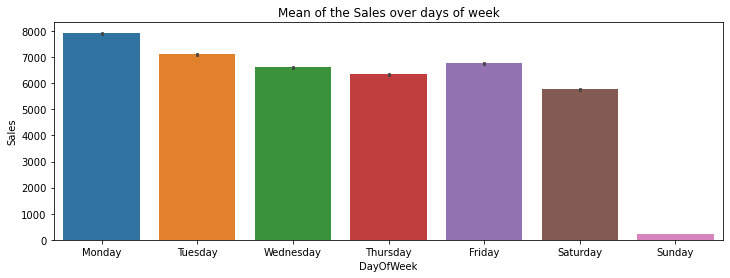

In [40]:
_, ax = plt.subplots(1, 1, figsize=(12,4))

sns.barplot(x = 'DayOfWeek', y = 'Sales', data=df_train, ax=ax)
ax.set_title('Mean of the Sales over days of week')
plt.xticks(days_num, days)
plt.show()

In [41]:
# _, ax1 = plt.subplots(1, 1, figsize=(12,4))

# sns.barplot(x = 'DayOfWeek', y = 'Sales', data=df_train, estimator = np.sum, ax=ax1) 
# ax1.set_title("Sum of the sales over days od week")
# plt.xticks(days_num, days)

# plt.show()


 Plot above show: 
 * The Big sales in Monday day and minimum slaes in Sunday which is the weekend 

In [42]:
# _, ax1 = plt.subplots(1, 1, figsize=(12,4))
# sns.lineplot(x='DayOfWeek', y='Sales', data=df_train, hue='Week', ax= ax1)
# plt.xticks(days_num, days)
# plt.title('Sales in all stores every day in weeks')

# plt.show()

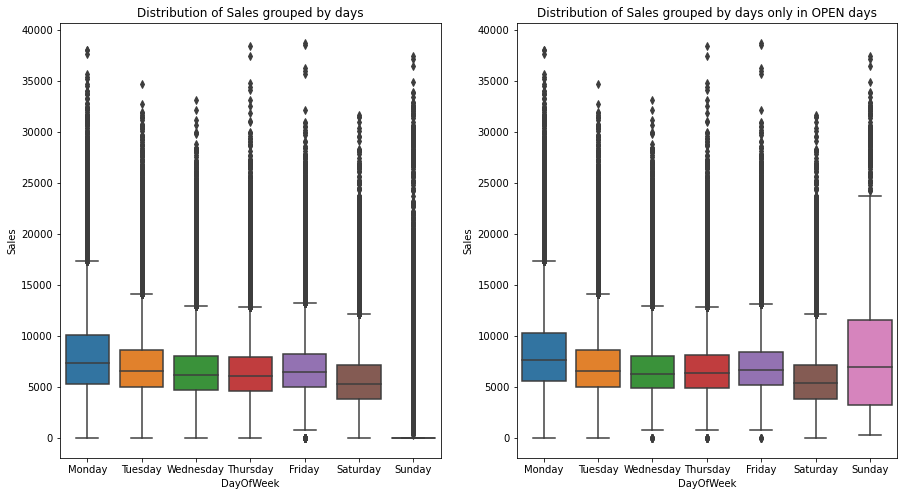

In [43]:
_, ax = plt.subplots(1,2, figsize=(15,8))
sns.boxplot(x='DayOfWeek', y='Sales', data=df_train, ax=ax[0])
ax[0].set_xticks(days_num)
ax[0].set_xticklabels(days)
ax[0].set_title('Distribution of Sales grouped by days')

sns.boxplot(x='DayOfWeek', y='Sales', data=df_train_open, ax=ax[1])
ax[1].set_xticks(days_num)
ax[1].set_xticklabels(days)
ax[1].set_title('Distribution of Sales grouped by days only in OPEN days')

plt.show()

The plots above show:


**Left plot which has all record**
* Many outliers in the distributtion of sales, may this because os the differnt store types or assortment. 
* Many outliers in Sunday ! 


**Right plot which has only the redods when stores are open**
* Distribution has shifted a litle bit to a above in most days
* Distribution has shifted more in sunday  

In [44]:
def outliers(groups, feature='group'):
    
    for gp_name, group in groups:
        num_outliers  = len(boxplot_stats(group).pop(0)['fliers'])
        num_entries = len(group)
        print(f'{feature} : {gp_name}')
        print(f'Number of outliers is: {num_outliers} from total which is: {num_entries}')
        print(f'Ratio of outliers {num_outliers/num_entries}\n')

In [45]:
sales_gpby_dayW = df_train_open.groupby(by='DayOfWeek')['Sales']

outliers(sales_gpby_dayW, 'Day of week')
# outliers

Day of week : 0
Number of outliers is: 3217 from total which is: 119394
Ratio of outliers 0.026944402566293112

Day of week : 1
Number of outliers is: 4290 from total which is: 124904
Ratio of outliers 0.034346378018318066

Day of week : 2
Number of outliers is: 4342 from total which is: 123060
Ratio of outliers 0.03528360149520559

Day of week : 3
Number of outliers is: 4414 from total which is: 117006
Ratio of outliers 0.03772456113361708

Day of week : 4
Number of outliers is: 4143 from total which is: 119940
Ratio of outliers 0.034542271135567786

Day of week : 5
Number of outliers is: 3994 from total which is: 124642
Ratio of outliers 0.032043773366922865

Day of week : 6
Number of outliers is: 126 from total which is: 3487
Ratio of outliers 0.03613421279036421



In [46]:
store_types = np.sort(df_store['StoreType'].unique())

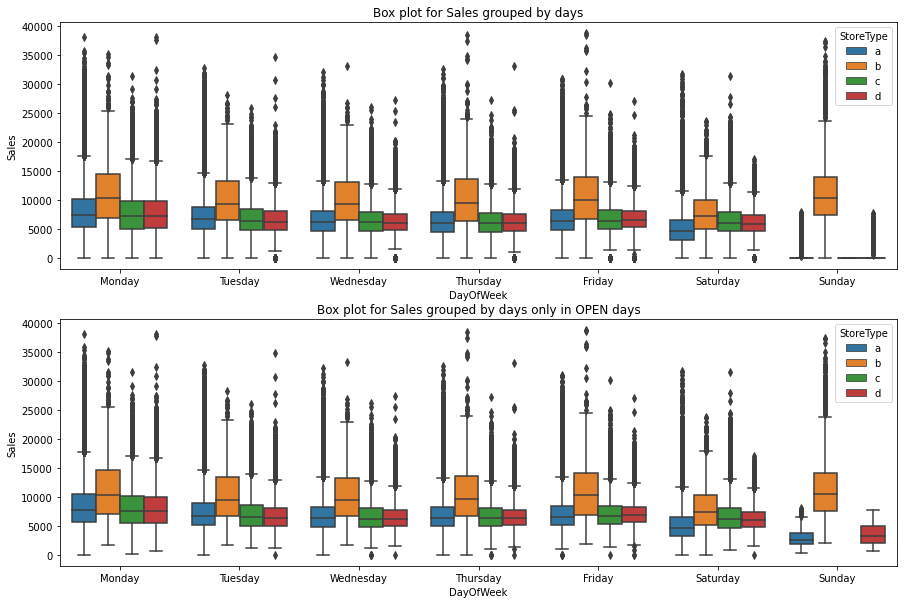

In [47]:
_, ax = plt.subplots(2,1, figsize=(15,10))

sns.boxplot(x='DayOfWeek', y='Sales', data=train_store, hue='StoreType',hue_order=store_types, ax=ax[0] )
ax[0].set_xticks(days_num,)
ax[0].set_xticklabels(days)
ax[0].set_title('Box plot for Sales grouped by days')

sns.boxplot(x='DayOfWeek', y='Sales', data=train_store_open, hue='StoreType',hue_order=store_types, ax=ax[1] )
ax[1].set_xticks(days_num,)
ax[1].set_xticklabels(days)
ax[1].set_title('Box plot for Sales grouped by days only in OPEN days')

# plt.legend(loc="upper left")
plt.show()

The plots show that: 

First plot: 
* The distribution of Sales in days almost same for different store types except for the 'b' store type.  

Second plot:
* Distribution has also shifted in most days especially in store type 'b'.
* There is no records for store type 'c' in sunday - which means stores that has type 'c' did not open in sunday.

In [48]:
assortment = np.sort(df_store['Assortment'].unique())
assort_num = [0, 1, 2]
assort_label = ['basic', 'extra', 'extended']
assort_label_dict = {'a' : 'basic', 'b' : 'extra', 'c' : 'extended'}
# a = basic, b = extra, c = extended

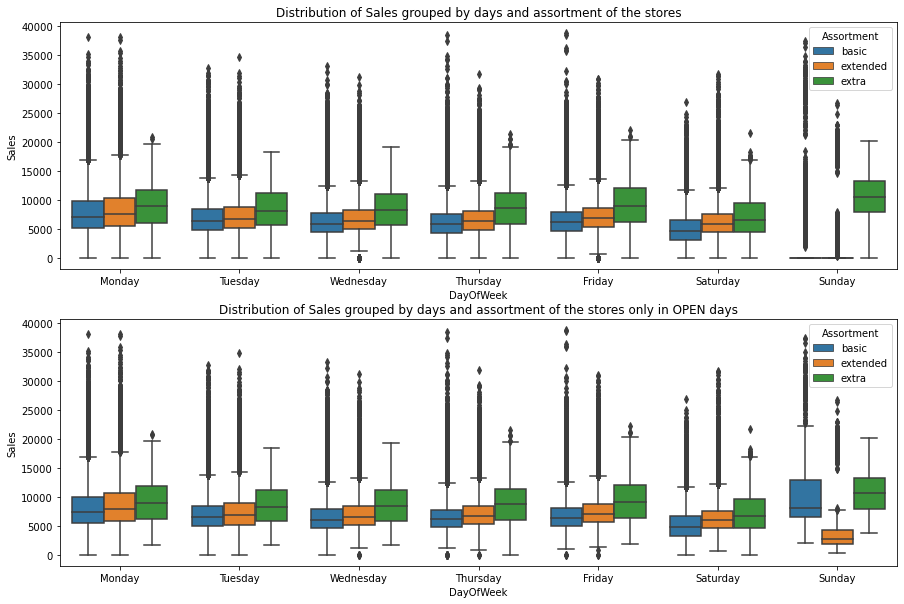

In [49]:
_, ax = plt.subplots(2,1, figsize=(15,10))
ax[0] = sns.boxplot(x='DayOfWeek', y='Sales', data=train_store, hue='Assortment',ax=ax[0])
ax[0].set_xticks(days_num,)
ax[0].set_xticklabels(days)
ax[0].set_title('Distribution of Sales grouped by days and assortment of the stores')

ax[1] = sns.boxplot(x='DayOfWeek', y='Sales', data=train_store_open, hue='Assortment',ax=ax[1])
ax[1].set_xticks(days_num,)
ax[1].set_xticklabels(days)
ax[1].set_title('Distribution of Sales grouped by days and assortment of the stores only in OPEN days')

for ax_i in ax:
    for t, l in zip(ax_i.legend_.texts, assort_label_dict):
        labl = t.get_text()
        t.set_text(assort_label_dict[labl])
    
plt.show()

Plots above show:


First:
* The distribution of sales in different days is arranged by the assortment of the store 
* The distribution of sales in 'extra' assortment stores in higher than the rest of stores that have different assortment 
* There is no many outliers in the 'extra' assortment stores


Second:
* Distribution has shifted to a above a litle bit in Thursday and Friday
* Distibution purly looks in Sunday

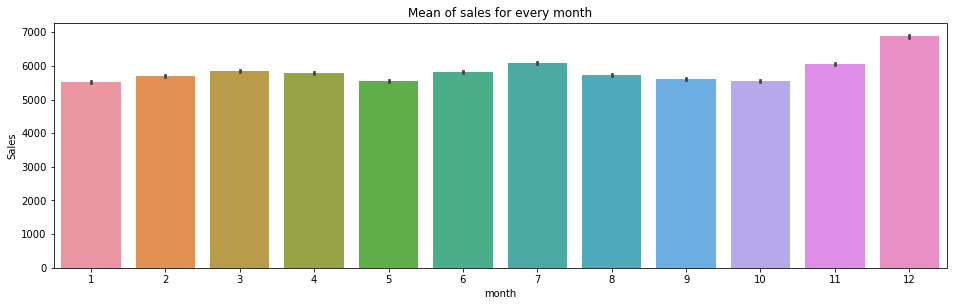

In [108]:
_, ax1 = plt.subplots(1,1, figsize=(16,4.5))

sns.barplot(x='month', y='Sales', data=df_train, ax = ax1)
ax1.set_title("Mean of sales for every month")

df_2015 = df_train[df_train.index.get_level_values('Date') >= pd.to_datetime("1-1-2015")] 
df_13_14 = df_train.drop(index = df_2015.index, axis=0)

# sns.barplot(x='month', y='Sales', data=df_13_14, ax = ax2, estimator = np.sum)
# ax2.set_title("Sum of sales for every month in 2013 and 2014")
# df_2015.index

The Plots above shows: 
* Big sales in Dec month and it goes down in Jan month 


### Open feature

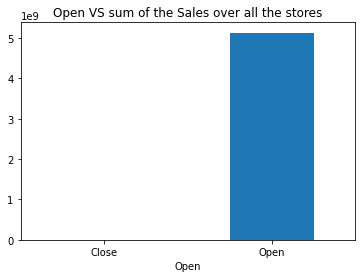

In [51]:
open_flag = [0,1]
open_str = ['Close', 'Open']
ax = df_train.groupby(by='Open')['Sales'].sum().plot(kind='bar')
ax.set_title('Open VS sum of the Sales over all the stores')
plt.xticks(open_flag, open_str, rotation ='horizontal')
plt.show()

In [52]:
df_train.groupby(by='Open')['Sales'].sum()

Open
0             0
1    5130818796
Name: Sales, dtype: int64

* Cells above shows that data is correct about Open feature. (Zero Sales when stores closed)

### Promo feature

In [53]:
promo_num = [0, 1]
promo_str = ['without promo', 'with promo']

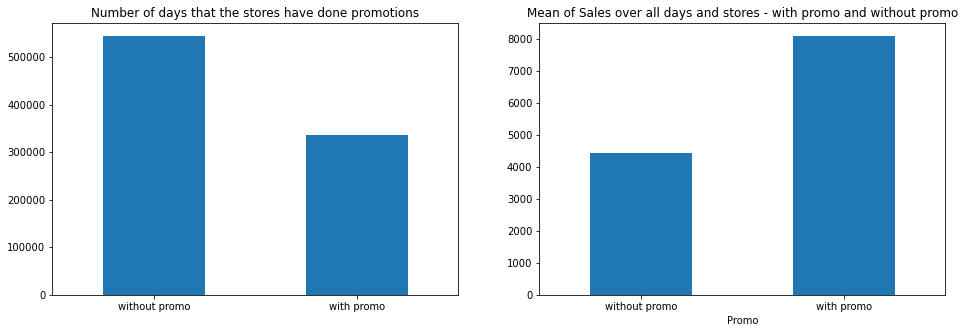

In [54]:
_, ax = plt.subplots(1,2, figsize=(16,5))

# df_train.groupby(by='Promo')['Sales'].sum().plot(kind='bar',ax=ax[0])
df_train['Promo'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of days that the stores have done promotions')

df_train.groupby(by='Promo')['Sales'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('Mean of Sales over all days and stores - with promo and without promo')

for ax_i in ax:
    ax_i.set_xticks(promo_num,)
    ax_i.set_xticklabels(promo_str, rotation='horizontal')

plt.show()

#### Promo Intervals

In [55]:

df_St1 = df_train.loc[1,:]
df_St1.reset_index(inplace=True)
fig = px.timeline(df_St1, x_start=df_St1["Date"] - timedelta(days=0.5), x_end=df_St1["Date"],
                  y=df_St1["Promo"],color='Promo' , color_continuous_scale=["red", "green"], range_color=[0,1])
fig.show()


The plots above shows:
* That there is a clear indication that the sales (at all) could be larger with Promo.
* Number of days that have a promotion in is lass than the days that does not have.
* By getting a store and check the timeline of the promo feature in it, we find that the promo have done as a sequence of 5 days respectively 

But:
* May the Promo does not affect directly the same day on the amount of sales ! May it affect after one or two days? 
* let's check 
* This below is wrong! 

In [56]:
df_train['promoBefore1Day'] = df_train['Promo'].shift(periods=1, fill_value=0)

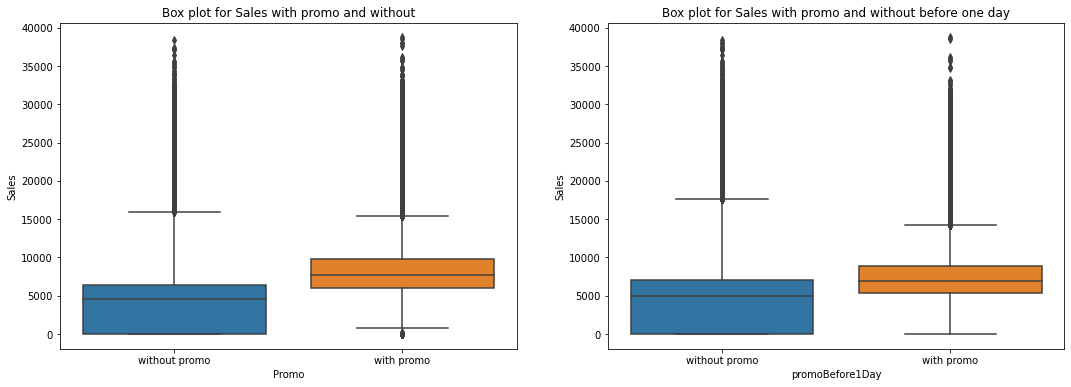

In [57]:
fig, ax = plt.subplots(1,2, sharex=False, figsize=(18,6))

sns.boxplot(x='Promo', y='Sales', data=df_train, ax=ax[0])

sns.boxplot(x='promoBefore1Day', y='Sales', data=df_train, ax=ax[1])

ax[0].set_title('Box plot for Sales with promo and without')
ax[1].set_title('Box plot for Sales with promo and without before one day')

for ax_i in ax: 
    ax_i.set_xticks(promo_num)
    ax_i.set_xticklabels(promo_str)
# plt.xticks(promo_num, promo_str, rotation='horizontal')

plt.show()

In [58]:
df_train.groupby(['Promo',])['Sales'].describe()

count         mean          std  min      25%     50%     75%  \
Promo                                                                     
0      544169.0  4424.055126  3471.600192  0.0     0.00  4631.0  6397.0   
1      336600.0  8090.864949  3462.079768  0.0  5974.75  7643.0  9730.0   

           max  
Promo           
0      38367.0  
1      38722.0

In [59]:
df_train.groupby(['promoBefore1Day'])['Sales'].describe() 

count         mean          std  min     25%     50%  \
promoBefore1Day                                                            
0                544170.0  4926.214753  3972.296596  0.0     0.0  4946.0   
1                336599.0  7279.048702  3293.529165  0.0  5305.0  6954.0   

                    75%      max  
promoBefore1Day                   
0                7040.0  38367.0  
1                8865.0  38722.0

Clear indication of this plots and numbers: 
* The assumption is not correct 

### Promo with Store type features

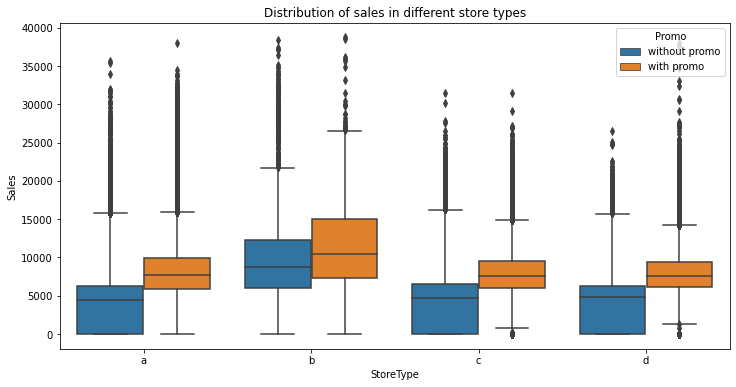

In [60]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='StoreType', y='Sales', hue='Promo', data=train_store, order=store_types)
plt.title('Distribution of sales in different store types')

leg_str = ax.legend_.texts
for i, leg_i in enumerate(leg_str):
    leg_i.set_text(promo_str[i])


The plot above shows:
* That the promo have a good effect on sales in different store types
* Except that the promo does not affect as the rest of stores that have differnt store_type 
* And notice that the minimum number of stores have `b` store type.

### Promo with assortment features

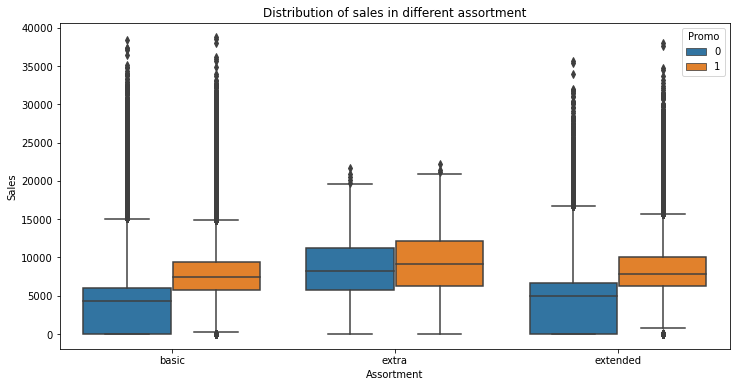

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Assortment', y='Sales', hue='Promo', data=train_store, order=assortment)
plt.title('Distribution of sales in different assortment')
plt.xticks(assort_num, assort_label)
# plt.legend(title = ''labels=['without promo', 'with promo'])
plt.show()

* Plot above also show that the promo does not affect the sales in `extra` assortment stores like what it did on differnet assortment 

Let's check the skewness of the sales in different of sales assortment and with/ without promo! 

### StateHoliday feature 

In [62]:
df_train['StateHoliday'].value_counts()

0    734451
0    120488
a     16480
b      5610
c      3740
Name: StateHoliday, dtype: int64

In [63]:
sta_holiday = [0, 1, 2, 3 ]
sta_labels = ['None', 'Public holiday', 'Easter holiday', 'Christmas']
df_train['StateHoliday'] = df_train['StateHoliday'].astype(str)

In [64]:
df_train['StateHoliday'].unique()

array(['a', '0', 'b', 'c'], dtype=object)

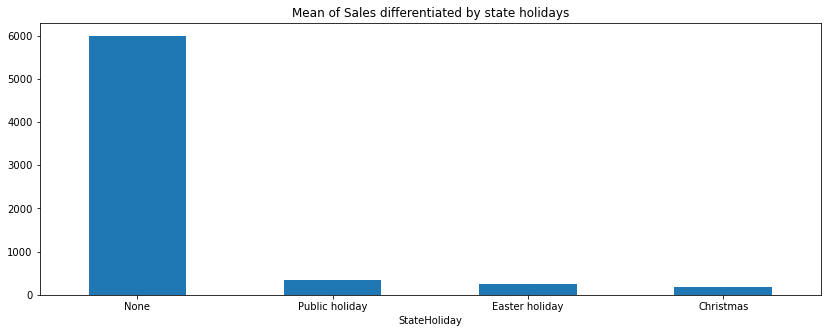

In [65]:
sales_sta_holiday = df_train.groupby(by='StateHoliday')['Sales']

fig, ax0 = plt.subplots(1,1,figsize=(14,5))
# sales_sta_holiday.sum().plot(kind='bar', ax=ax0[0])
# ax0[0].set_title('Sum of Sales differentiated by state holidays')

sales_sta_holiday.mean().plot(kind='bar', ax=ax0)
ax0.set_title('Mean of Sales differentiated by state holidays')

# for ax_i in ax0:
ax0.set_xticks(sta_holiday,)
ax0.set_xticklabels(sta_labels, rotation=0,)

plt.show()


Plots above shows:
* Sales when there is no state holiday is larger than when there is a state holidays.
* Number od days in the records that have state holiday is much less than the days that does not have state holiday.
* There is many high values in public holiday 
* Some peaks of sales before Chrismas holiday and ester holiday 

`But is the stores have to be closed in these days of holidays or they will stay opened and the holidays only for people, so thay can go outside their homes ? ` let's check 

Plot above and the data shows:
* Stores could be close if there is a state holiday most of the time 
* There are many closed days - may this days are the weekend days

### SchoolHoliday feature 

In [66]:
holi_nums = [0,1]
holi_labels = ['No Holiday', 'Holiday']

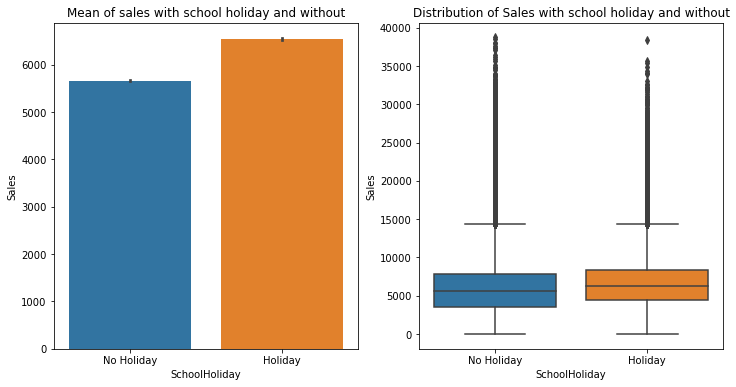

In [67]:
_, ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot(x='SchoolHoliday', y='Sales', data=df_train, ax=ax[0],estimator = np.mean) # mean
ax[0].set_title('Mean of sales with school holiday and without')

sns.boxplot(x='SchoolHoliday', y='Sales', data=df_train, ax=ax[1])
ax[1].set_title('Distribution of Sales with school holiday and without')

for ax_i in ax:
    ax_i.set_xticks(holi_nums, )
    ax_i.set_xticklabels(holi_labels)
plt.show()

Plots above show: 
* Sales is better when there are school holidays
* The distribution of sales when there are school holiday is a little more than when there are no holiday


### Store type feature

Text(0.5, 1.0, 'Sum of slaes in different store types')

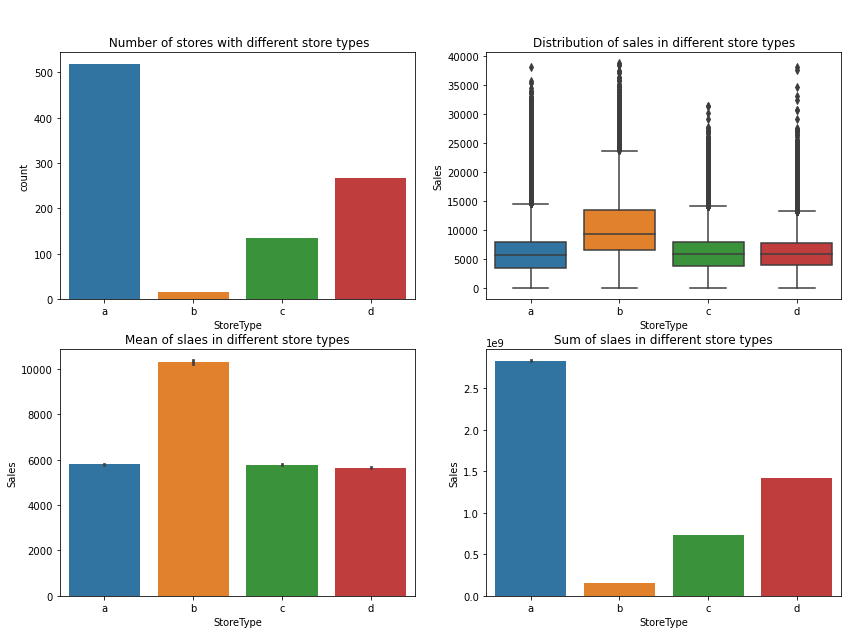

In [102]:
_, ax = plt.subplots(2, 2, figsize=(14, 10))


sns.countplot(x='StoreType', data=df_store, ax=ax[0][0], order=store_types)
ax[0][0].set_title('\n\n Number of stores with different store types',)

sns.boxplot(x='StoreType', y='Sales', data=train_store, order=store_types, ax=ax[0][1])
ax[0][1].set_title('Distribution of sales in different store types')

sns.barplot(x='StoreType', y='Sales', data=train_store, order=store_types, ax=ax[1][0])
ax[1][0].set_title('Mean of slaes in different store types')

sns.barplot(x='StoreType', y='Sales', data=train_store, order=store_types, ax=ax[1][1], estimator=np.sum)
ax[1][1].set_title('Sum of slaes in different store types')

# sns.barplot(x='StoreType', y='Customers', data=train_store, order=store_types, ax=ax[2][0], )
# ax[2][0].set_title('Mean of Customers in different store types')

# sns.barplot(x='StoreType', y='Customers', data=train_store, order=store_types, ax=ax[2][1], estimator=np.sum)
# ax[2][1].set_title('Sum of Customers in different store types')


Plots above shows: 
* Number of stores that have store type `b` is the less number of stores 
* The distribution of sales in stores type `b` is higher than the other store types 
* Also mean of sales is the higher in store type `b`
* Because the number of stores that have type `b` is the lower one so the sumation of sales and customers colud be small ! 

In [69]:
sales_gpby_dayW_stor_type = train_store_open.groupby(by='StoreType')['Sales']

outliers(sales_gpby_dayW_stor_type, 'Store Type')

Store Type : a
Number of outliers is: 15271 from total which is: 404911
Ratio of outliers 0.037714460708649554

Store Type : b
Number of outliers is: 227 from total which is: 14818
Ratio of outliers 0.015319206370630315

Store Type : c
Number of outliers is: 3301 from total which is: 104300
Ratio of outliers 0.031649089165867686

Store Type : d
Number of outliers is: 5367 from total which is: 208404
Ratio of outliers 0.025752864628318075



### Assortment feature

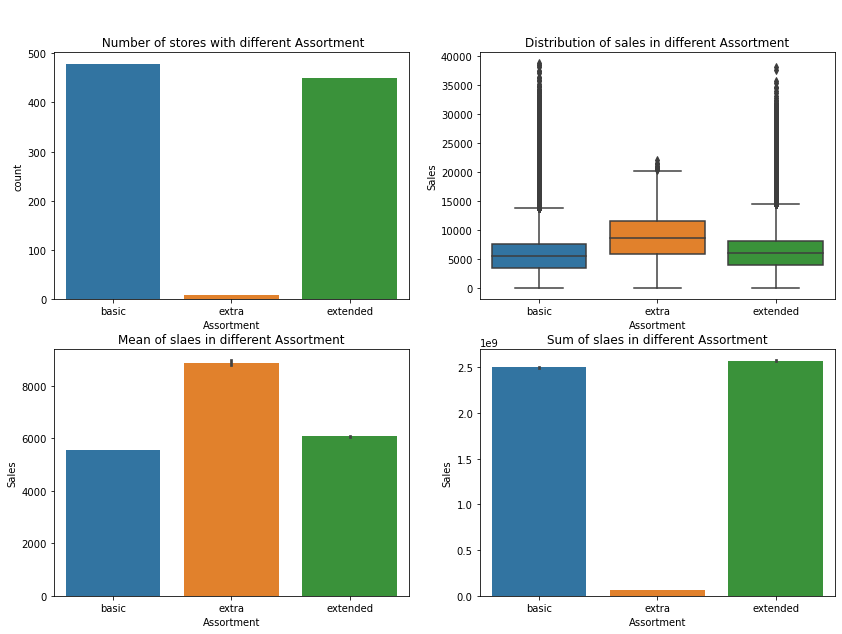

In [103]:

_, ax = plt.subplots(2, 2, figsize=(14, 10))


sns.countplot(x='Assortment', data=df_store, ax=ax[0][0], order=assortment)
ax[0][0].set_title('\n\n Number of stores with different Assortment',)

sns.boxplot(x='Assortment', y='Sales', data=train_store, order=assortment, ax=ax[0][1])
ax[0][1].set_title('Distribution of sales in different Assortment')

sns.barplot(x='Assortment', y='Sales', data=train_store, order=assortment, ax=ax[1][0])
ax[1][0].set_title('Mean of slaes in different Assortment')

sns.barplot(x='Assortment', y='Sales', data=train_store, order=assortment, ax=ax[1][1], estimator=np.sum)
ax[1][1].set_title('Sum of slaes in different Assortment')

# sns.barplot(x='Assortment', y='Customers', data=train_store, order=assortment, ax=ax[2][0], )
# ax[2][0].set_title('Mean of Customers in different Assortment')

# sns.barplot(x='Assortment', y='Customers', data=train_store, order=assortment, ax=ax[2][1], estimator=np.sum)
# ax[2][1].set_title('Sum of Customers in different Assortment')

for ax_i in ax: 
    for ax_ij in ax_i:
        ax_ij.set_xticks(assort_num,)
        ax_ij.set_xticklabels(assort_label)


Plots above shows: 
* almost the same analysis (like store type) but for the `extra` assortment

In [71]:
sales_gpby_dayW_stor_type = train_store_open.groupby(by='Assortment')['Sales']

outliers(sales_gpby_dayW_stor_type, 'Assortment')

Assortment : a
Number of outliers is: 12560 from total which is: 373501
Ratio of outliers 0.033627754678032994

Assortment : b
Number of outliers is: 10 from total which is: 7467
Ratio of outliers 0.0013392259274139548

Assortment : c
Number of outliers is: 14064 from total which is: 351465
Ratio of outliers 0.04001536426102172



# Time series features

Sumation of sales in all stores 

In [72]:
# store_sales_df.reset_index('StoreType', inplace=True)
sum_sales = df_train.groupby('Date')['Sales'].agg(['sum'])

In [73]:
sum_sales_rolled = sum_sales.rolling(
    window =365,
    center=True, 
    min_periods=183,
).mean()

px.line(sum_sales_rolled, x=sum_sales_rolled.index,  y='sum', 
       title='Trend of Sales in all stores ')

In [74]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1y") / pd.Timedelta("1d")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [75]:
df_train_gp_date = df_train.groupby('Date')[['Sales']].sum()

df_train_gp_date['year'] = df_train_gp_date.index.year
df_train_gp_date['dayofyear'] = df_train_gp_date.index.dayofyear
 
# df_train_gp_date = df_train_gp_date.to_frame()
fig = px.line(df_train_gp_date, x='dayofyear', y='Sales', color='year',
                 title=f'Seasonality of sales in all rossmann stores')
fig.show()
# df_train_gp_date.head()

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2339797700.py:2: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version



<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

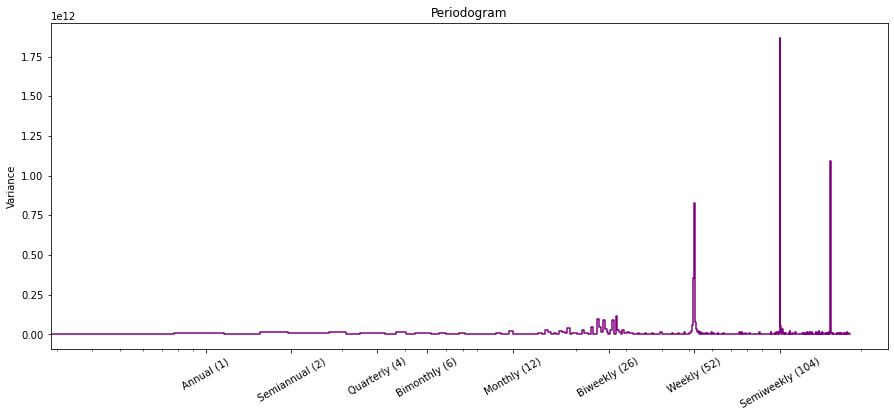

In [76]:
_ ,  ax = plt.subplots(1,1, figsize=(15,6))
plot_periodogram(sum_sales['sum'], ax=ax)

## Store type

In [77]:
store_type_sales_df = train_store.groupby(['Date', 'StoreType'])[['Sales', 'Customers']].sum()
store_type_sales_df.reset_index('StoreType', inplace=True)
store_type_sales_df.sort_values(by=['StoreType', 'Date'], inplace=True)


# store_type_sales_df.head()

In [78]:
px.line(store_type_sales_df, x=store_type_sales_df.index, y='Sales', color='StoreType',
       title='Total sales in different store types'
       )

In [79]:
store_type_sales_df.set_index('StoreType', inplace=True, append=True)

### Seasonality 

In [80]:
df_train.head()

Sales  Customers  Open  Promo StateHoliday  SchoolHoliday  \
Store Date                                                                    
1     2013-01-01      0          0     0      0            a              1   
      2013-01-02   5530        668     1      0            0              1   
      2013-01-03   4327        578     1      0            0              1   
      2013-01-04   4486        619     1      0            0              1   
      2013-01-05   4997        635     1      0            0              1   

                  DayOfWeek  Week  month  year  dayofyear  promoBefore1Day  
Store Date                                                                  
1     2013-01-01          1     1      1  2013          1                0  
      2013-01-02          2     1      1  2013          2                0  
      2013-01-03          3     1      1  2013          3                0  
      2013-01-04          4     1      1  2013          4                0  
      2013-01-05          5     1      1  2013          5                0

In [81]:
store_type_sales_df.reset_index('StoreType', inplace= True)

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2877170266.py:10: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2877170266.py:10: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2877170266.py:10: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2877170266.py:10: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2877170266.py:13: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

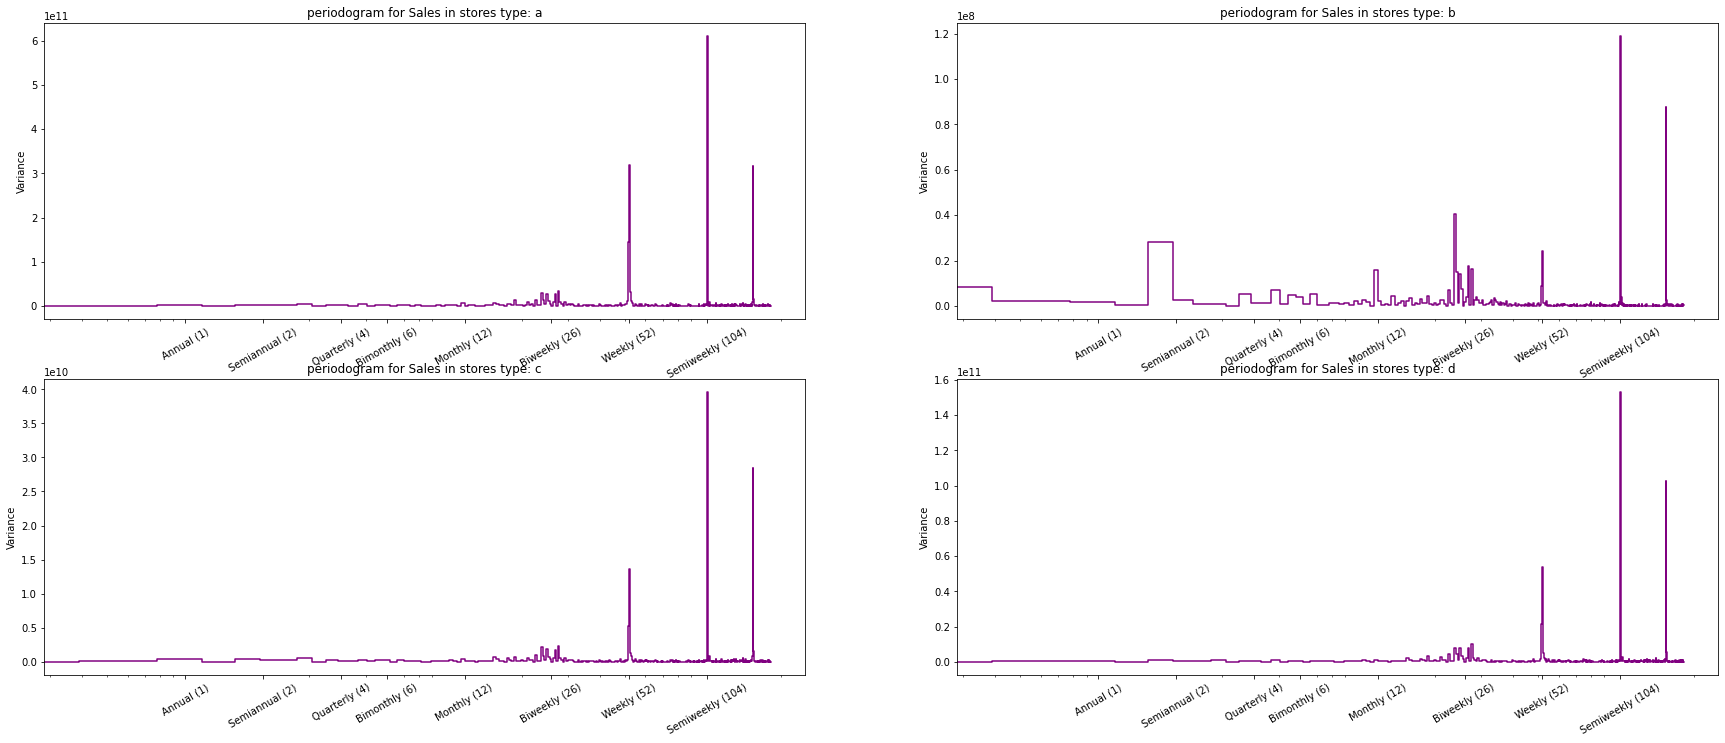

In [82]:
store_sales_df_gp_storeTp = store_type_sales_df.groupby('StoreType')
fig, ax = plt.subplots(2,2,figsize=(30,12))

store_names = store_sales_df_gp_storeTp.groups.keys()
store_names = list(store_names)
i = 0 
for ax_i in ax:
    for ax_ij in ax_i:  
        group = store_sales_df_gp_storeTp.get_group(store_names[i])
        ax_ij = plot_periodogram(group['Sales'], ax=ax_ij)
        ax_ij.set_title(f"periodogram for Sales in stores type: {store_names[i]}")
        i+=1
fig.show()

## Assortment

In [83]:
assort_sales_df = train_store.groupby(['Date', 'Assortment'])[['Sales', 'Customers']].sum()
assort_sales_df.reset_index('Assortment', inplace=True)
assort_sales_df.set_index('Assortment', append=True, inplace=True)

In [84]:
assort_sales_gp_rolled = assort_sales_df.groupby(by='Assortment').transform(lambda x: x.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean())

assort_sales_gp_rolled.reset_index('Assortment', inplace=True)

assort_sales_gp_rolled['year'] = assort_sales_gp_rolled.index.year
assort_sales_gp_rolled['dayofyear'] = assort_sales_gp_rolled.index.dayofyear


In [85]:
assort_sales_df.head()
assort_sales_df.reset_index('Assortment', inplace=True)
assort_sales_df['year'] = assort_sales_df.index.year
assort_sales_df['dayofyear'] = assort_sales_df.index.dayofyear

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2978411954.py:10: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2978411954.py:10: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2978411954.py:10: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version

C:\Users\ASHRAF~1\AppData\Local\Temp/ipykernel_18896/2978411954.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



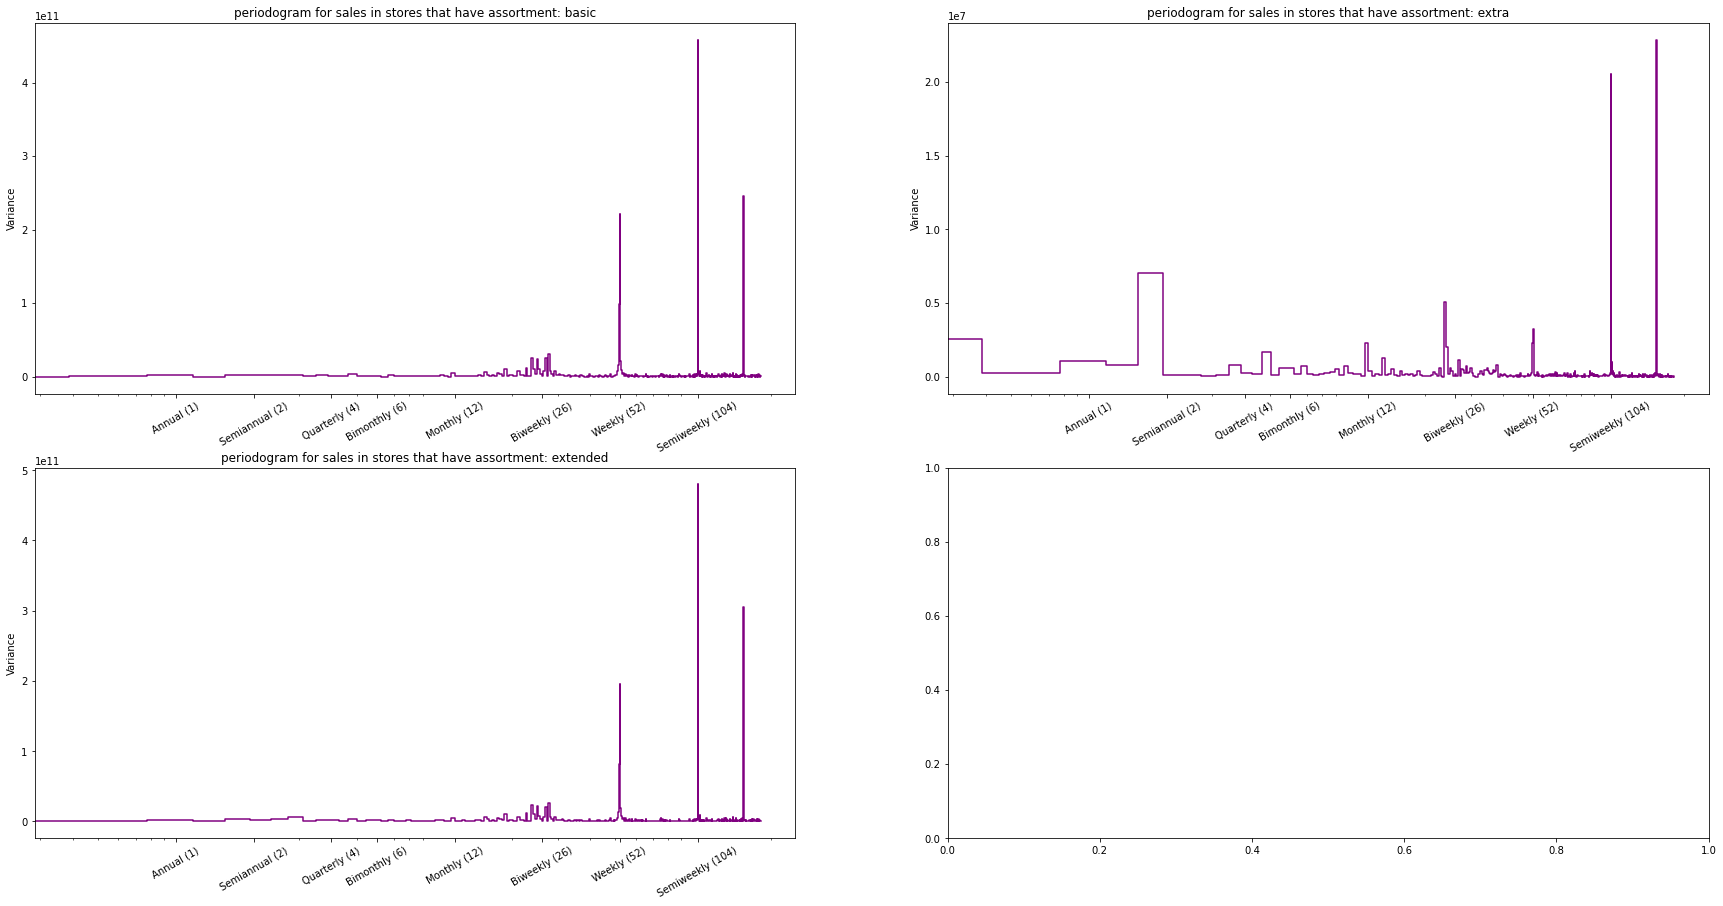

In [86]:
assort_sales_df_gp_assot = assort_sales_df.groupby('Assortment')

fig, ax = plt.subplots(2,2, figsize=(30,15))
assort_names = assort_sales_df_gp_assot.groups.keys()
assort_names = list(assort_names)
i = 0 
for ax_i in ax:
    for ax_ij in ax_i:  
        group = assort_sales_df_gp_assot.get_group(assort_names[i])
        ax_ij = plot_periodogram(group['Sales'], ax=ax_ij)
        ax_ij.set_title(f"periodogram for sales in stores that have assortment: {assort_label_dict[assort_names[i]]}")
        i+=1
        if(i >= len(assort_names)):
            break;
fig.show()

-------------------------------------

In [87]:
# df_store.head()

In [88]:
# df_train.head()

### Competition distance feature 

In [89]:
df_train.reset_index('Date', inplace=True)

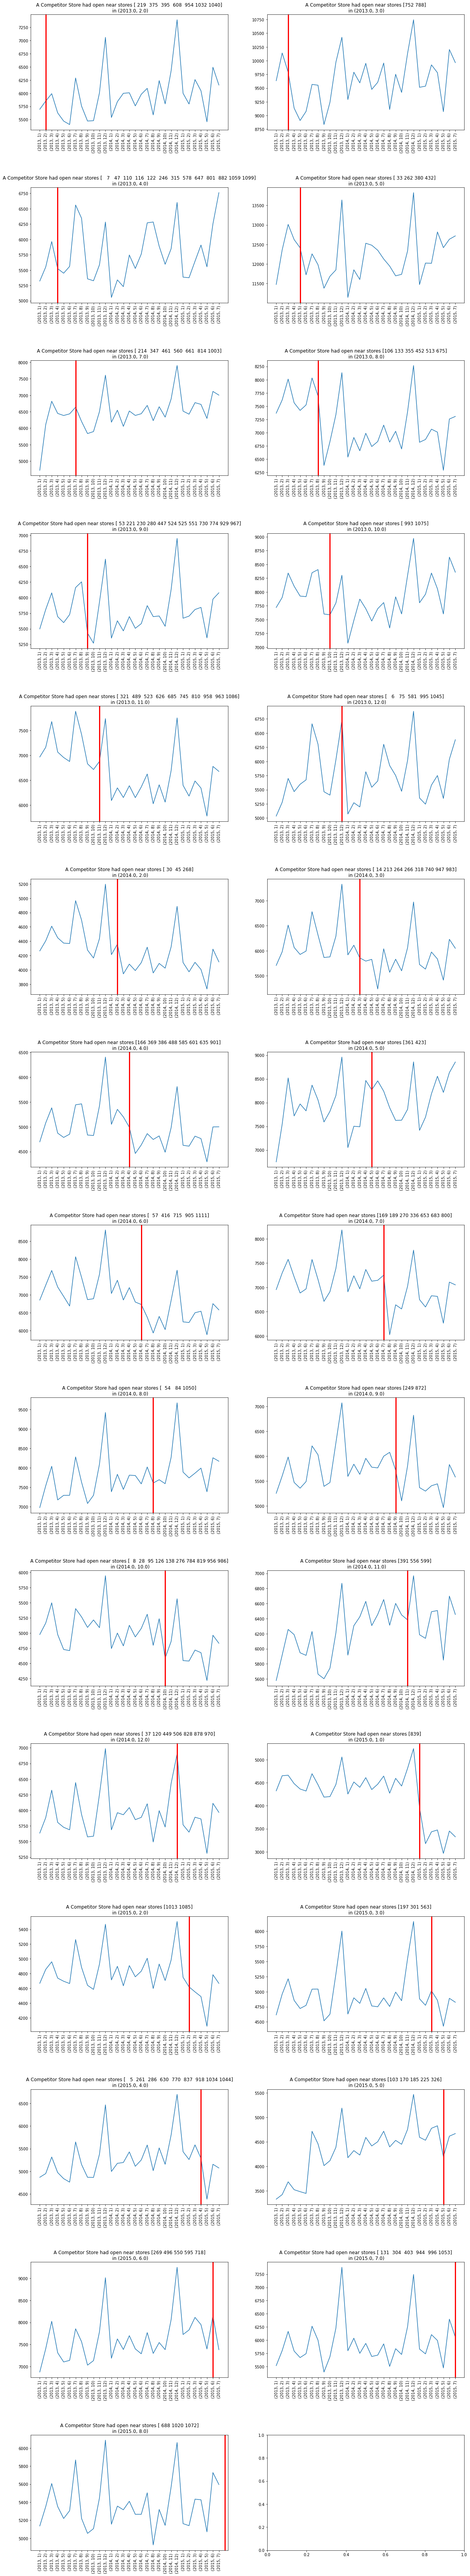

In [90]:
fig, ax = plt.subplots(15, 2, figsize=(20,120))
plt.subplots_adjust(hspace=0.5,)
comp_groups = df_store[df_store['CompetitionOpenSinceYear'] >=2013].groupby(['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'])
comp_grps_name = list(comp_groups.groups)

i=j=0
for ax_i in ax:
    for ax_ij in ax_i:
        grp = comp_groups.get_group(comp_grps_name[i])
        store_train = df_train.loc[grp.index,:]
        mean_sales_stores = store_train.groupby(['year', 'month'])['Sales'].mean()
        
        ax_ij.set_xticks(list(mean_sales_stores))
        ax_ij.set_xticks(range(len(mean_sales_stores)))
        ax_ij.set_xticklabels(mean_sales_stores.index.tolist(), rotation=90)
        ax_ij.plot(mean_sales_stores.values)
        
        ax_ij.axvline(x= ((int (comp_grps_name[i][0])-2013) * 12) + (int(comp_grps_name[i][1]) - 1), color='red',linewidth=3)
        ax_ij.set_title(f'A Competitor Store had open near stores {grp.index.values}\n in {comp_grps_name[i]}')
        
        if(i==28):
            break
        i+=1
        

#### Correlation 

<AxesSubplot:>

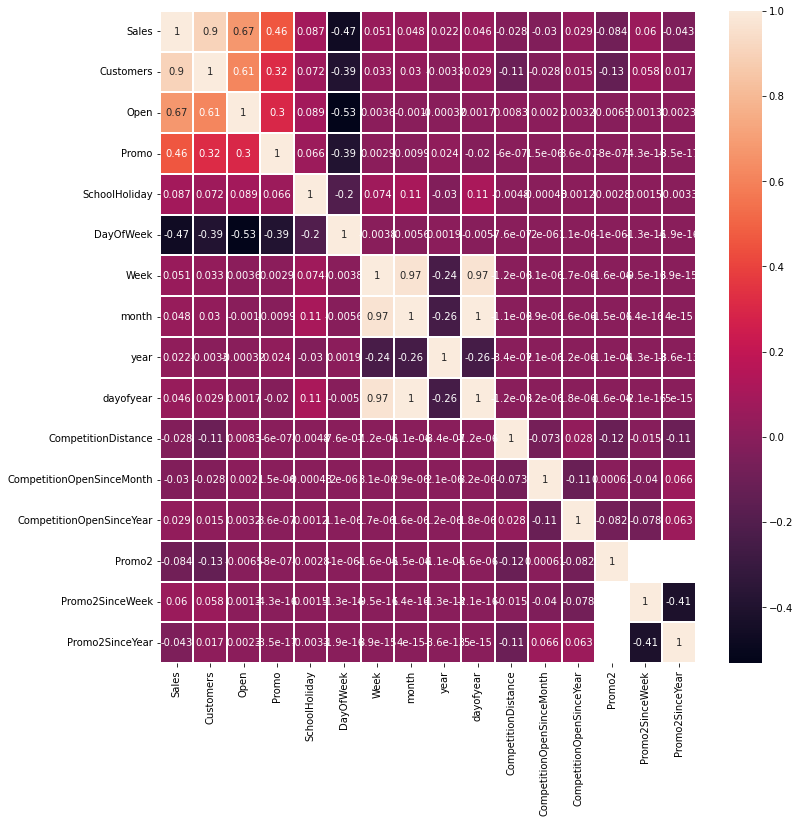

In [91]:
corr_tr_st = train_store.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_tr_st,annot=True,linewidths=0.2)

### Promo2 feature affects on the sales 

In [92]:
# df_store.head()

In [93]:
# df_train.head()

In [94]:
df_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec', 'Feb,May,Aug,Nov'],
      dtype=object)

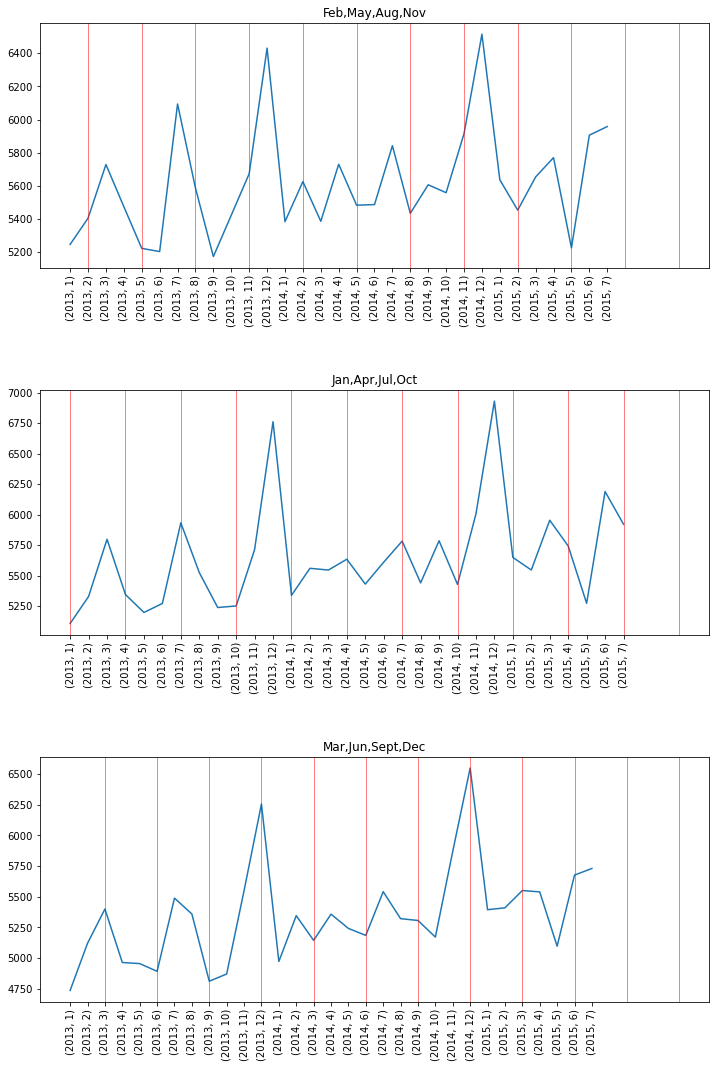

In [96]:
month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sept':9, 'Oct':10, 'Nov':11, 'Dec':12}
year_months = list(df_train[df_train['year'] >=2013].groupby(['year', 'month']).groups)
promo2_before2013 = df_store[(df_store['Promo2'] == 1) & (df_store['Promo2SinceYear'] < 2013)].groupby(['PromoInterval'])
fig, ax = plt.subplots(3, 1, figsize=(12,18))
fig.subplots_adjust(hspace=0.5)
i=0
for name, group in promo2_before2013:
    mean_sales = df_train.loc[group.index].groupby(by=['year', 'month'])['Sales'].mean()
    ax[i].plot(mean_sales.values)
    ax[i].set_title(name)
    ax[i].set_xticks(range(len(year_months)))
    ax[i].set_xticklabels(year_months, rotation=90)
    months = name.split(',')
    for month in months:
        ax[i].axvline(x=month_dict[month]-1, linewidth=0.5, color='red')
        ax[i].axvline(x=12+month_dict[month]-1, linewidth=0.5, color='red')
        ax[i].axvline(x=24+month_dict[month]-1, linewidth=0.5, color='red')
        
    i+=1


### Autocorreltion and Partial autocorrelation 

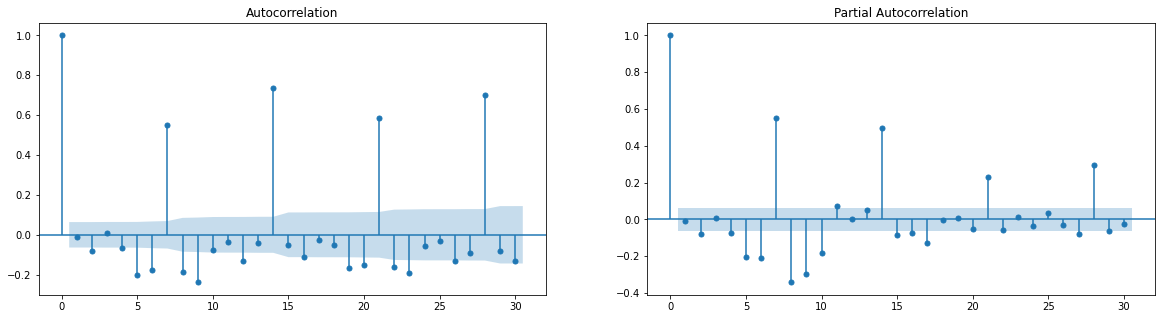

In [97]:
_, ax = plt.subplots(1,2, figsize=(20,5))

s=smt.graphics.plot_acf(sum_sales['sum'], ax=ax[0],)
m=smt.graphics.plot_pacf(sum_sales['sum'], ax=ax[1],)

### May all stores do Promo in the same days 

In [98]:
df_train.set_index('Date', inplace=True, append=True)

In [99]:

unstacked_train_promo = df_train.unstack(level=0)['Promo']  # ['Promo'].columns #.head().loc[:, ('Promo', (1,2,3,4))]


stores_id = unstacked_train_promo.columns

all_equal = True
for i in range(len(stores_id)-1): 
    stor1 = unstacked_train_promo.loc[unstacked_train_promo[1] == 1, stores_id[i]].index #.loc[:, ('Promo', stores_id[0])].index
    stor2 = unstacked_train_promo.loc[unstacked_train_promo[1] == 1, stores_id[i+1]].index #.loc[:, ('Promo', stores_id[1])].index
    is_equal = stor1.equals(stor2)

    if(not is_equal):
        all_equal = False
        break

print(all_equal)

unstacked_train_promo[unstacked_train_promo == 1]


True


Store       1     2     3     4     5     6     7     8     9     10    ...  \
Date                                                                    ...   
2013-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2013-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2013-01-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2013-01-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2013-01-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2015-07-27   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
2015-07-28   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
2015-07-29   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
2015-07-30   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
2015-07-31   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   

Store       1103  1105  1106  1108  1110  1111  1112  1113  1114  1115  
Date                                                                    
2013-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2013-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2013-01-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2013-01-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2013-01-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2015-07-27   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
2015-07-28   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
2015-07-29   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
2015-07-30   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
2015-07-31   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  

[942 rows x 935 columns]

WOW: 

- All of rossmann stores have done Promos in the same days all over the interval from `1-1-2013` to `31-7-2015`. 
- That means I can use hierarchical approches like middle out without lossing this important feature. 

In [ ]:
df_train.reset_index('Date', inplace=True)

In [ ]:
# ! pip install pmdarima

In [ ]:
# ! pip install pystan==2.19.1.1


In [ ]:
# ! pip install prophet

### Check Stationarity by ADFuller for all stores 

In [ ]:
df_train.set_index('Date', append=True, inplace=True)

In [ ]:
df_train_sales = df_train['Sales'].unstack(level=0)

In [ ]:
df_train_sales.isnull().sum().sum()

In [ ]:
df_train_sales.fillna(method='bfill', axis=1, inplace=True)

In [ ]:
all_not_stationary = True
store_have_stationarity = []
for col in df_train_sales.columns:
#     df_train_sales[col]
    adf_test= adfuller(df_train_sales[col])
    adf_val = adf_test[0]
    p_val = adf_test[1]
    if(p_val > 0.05):
        all_not_stationary = False
        store_have_stationarity.append(col)
#         break;
        
print(all_not_stationary)


In [ ]:
print('Number of stors that have statinarity:',len(store_have_stationarity))
print(store_have_stationarity)

- Cells above shows that 24 store have stationarity and the rest of stores does not have stationarity 

### Split data To train and test 

In [ ]:
train_until = datetime(2015,4,30)

In [ ]:
train_stores = df_train_sales.loc[:train_until, :]
test_stores = df_train_sales.loc[train_until+timedelta(days=1):, ]

### Do train for stores that have stationarity by ARMA model 

In [ ]:
mae = []
for col in store_have_stationarity: 
    model = pm.auto_arima(train_stores[col],
                          start_p=0 , d=0, start_q=0,      # d for difference , data here is stationary - does not have to do differencing
                          max_p=7, max_q=7,
                          start_Q=0, max_Q=3,
                          start_P=0, max_P=3,
                          m=52,                       # week seasonality 
                          scoring='mae'
                         )
    
    pred = model.predict(len(test_stores[col]))
    resid = test_stores[col] - pred 
    mae.append(np.mean(abs(resid)))
    

In [ ]:
print(mae)

In [ ]:
df_train[df_train['dayofweek'] == 17]

In [ ]:
import pmdarima as pm
import numpy as np 
# from pmdarima.datasets import load_wineind

# # this is a dataset from R
# wineind = load_wineind().astype(np.float64)

# # fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(sum_sales, start_p=1, start_q=1,
                             max_p=10, max_q=9, m=7,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise
# sum_sales.head()

In [ ]:
stepwise_fit.summary()

In [ ]:
# plt.figure(figsize=(10,10))
s=stepwise_fit.plot_diagnostics(figsize=(10,10))


In [ ]:
# df_store.head(20)

In [ ]:
! conda install -c conda-forge jupyter_contrib_nbextensions
